# Estimating and Plotting $x(t)$ from a first order ODE involving $t,x(t),x'(t)$

Importing Requisite Packages

In [64]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pandas as pd
sns.set() # uncomment to not use the seaborn aesthetic configuration
import matplotlib as mpl

#mpl.rcParams.update(mpl.rcParamsDefault) #uncomment to use dark background
#plt.style.use("dark_background") #uncomment to use dark background
plt.style.use("fivethirtyeight")

Estimates $x(t)$ given an expression for $x'(t)$ as well as an initial value at $x(t_0)$.

In [90]:
#sample function for x(t) -> customize to desired ODE
def derivative(x,t):
  return(3*x)

#estimates x(t) given some initial condition x(t_0) = x_0 via Euler's method
def estimate(derivative,t,t_0,x_0,num_iterations = 50000):
  if (t == t_0):
    return(x_0)
  elif (t > t_0): #forward simulation
    step_size = float(t-t_0)/num_iterations
    current_x = x_0
    current_t = t_0
    for i in range(num_iterations):
      current_x = current_x + step_size * derivative(current_x,current_t)
      current_t = current_t + step_size 
    return(current_x)
  else: #backward simulationr
    step_size = float(t_0-t)/num_iterations
    current_x = x_0
    current_t = t_0
    for i in range(num_iterations):
      current_x = current_x - step_size * derivative(current_x,current_t)
      current_t = current_t - step_size 
    return(current_x)    

def print_estimate(derivative,t,t_0,x_0,num_iterations=50000):
  est = estimate(derivative,t,t_0,x_0,num_iterations)
  print("t = " + str(t) + ": x(t) = " + str(est))

Example of using the function with the print harness. Here, we estimate $x(2)$ given $x(0)=1$ and homogenuous ODE $$x'(t) = 2tx(t) $$.

In [95]:
#example of using the function with the print harness
def dx(x,t):
  return(2*t*x)

print_estimate(dx,2,0,1,100000)

t = 2: x(t) = 54.590143211781


Plotting the function $x(t)$ with respect to $t$ in the interval $[t_0,t]$ by storing intermediate estimated values in an array. 

In [98]:
def array_generator(derivative,t,t_0,x_0,num_iterations = 1000):
  BUFFER = np.zeros(shape=(num_iterations + 1))
  BUFFER[0] = x_0
  if (t == t_0): #returns an array populated with the same value
    BUFFER = [x_0 for i in range(num_iterations+1)]
    return(BUFFER)
  elif (t > t_0): #forward simulation to incrementally populate the array
    step_size = float(t-t_0)/num_iterations
    current_x = x_0
    current_t = t_0
    for i in range(num_iterations):
      current_x = current_x + step_size * derivative(current_x,current_t)
      BUFFER[i+1] = current_x
      current_t = current_t + step_size 
  else: #backward simulation to incrementally populate the array
    step_size = float(t_0-t)/num_iterations
    current_x = x_0
    current_t = t_0
    for i in range(num_iterations):
      current_x = current_x - step_size * derivative(current_x,current_t)
      BUFFER[i+1] = current_x
      current_t = current_t - step_size 
  return(BUFFER)

#plotting harness -> recommend dampening down iterations for greater efficiency
def x_plotter(derivative,t,t_0,x_0,num_iterations = 1000,color="lime",linewidth=1,label=None):
  BUFFER = array_generator(derivative,t,t_0,x_0)
  if (label == None):
    plt.plot(np.linspace(t_0,t,num_iterations+1),BUFFER,color=color,linewidth=linewidth)
  else:
    plt.plot(np.linspace(t_0,t,num_iterations+1),BUFFER,color=color,linewidth=linewidth,label=label)

Example of using the plotter for multiple functions interspersed on the same graph. Here we have $x'(t) = 1.2x(t)$ and $x'(t) = x(t)$, both with initial conditions (0,1), and we graph from t=0 to t=4.

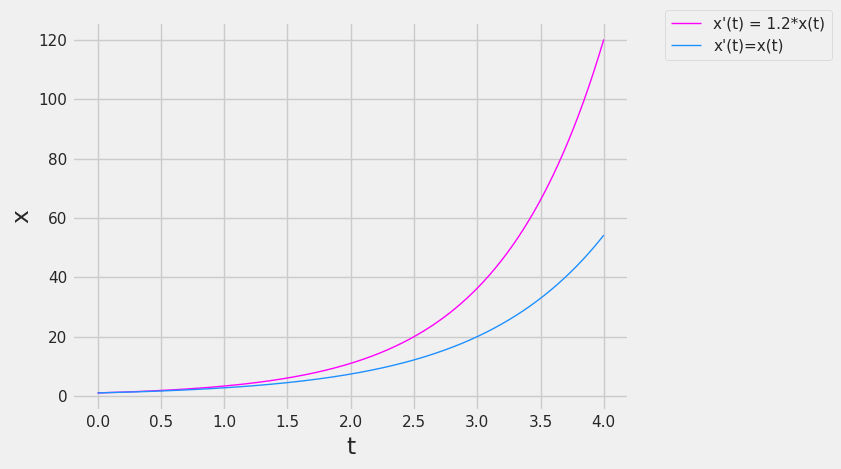

In [109]:
def dx(x,t):
  return(1.2*x)
x_plotter(dx,4,0,1,1000,color="magenta",label="x'(t) = 1.2*x(t)")
def dx(x,t):
  return(x)
x_plotter(dx,4,0,1,1000,color="dodgerblue",label="x'(t)=x(t)")
plt.xlabel("t")
plt.ylabel("x")
plt.legend(bbox_to_anchor=(1.05,1.05))
plt.show()

Plotting in both directions from an initial value. Here, we plot the graph of $x(t)$ from $t \in [-1,1]$ with $x(0) = 0$ and $$x'(t) = x^2 + 1$$

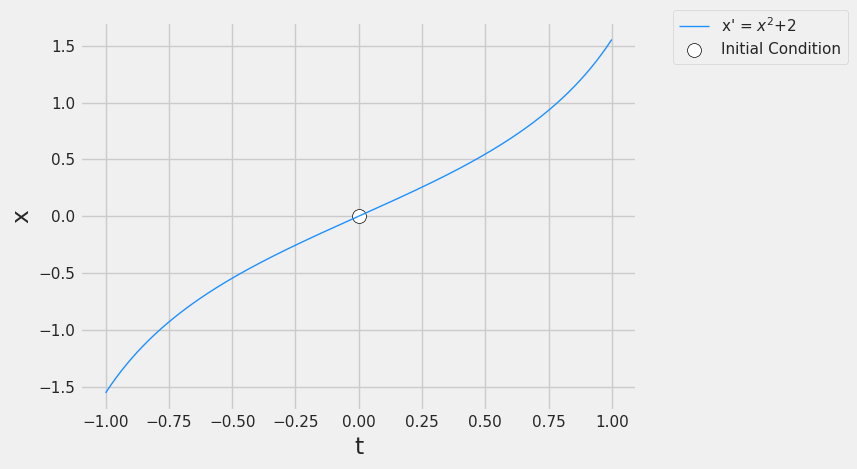

In [114]:
def dx(x,t):
  return(x**2+1)
#plotting from t=0 to t=1 (note this is just a scaled arctan graph)
x_plotter(dx,1,0,0,1000,color="dodgerblue",label="x' = $x^2$+2")
#plotting from t=-1 to t=0 (note this is just a scaled arctan graph)
x_plotter(dx,-1,0,0,1000,color="dodgerblue")
#plotting the initial condition as a dot
plt.scatter(x=[0],y=[0],color="white",edgecolor="black",s=100,label="Initial Condition")
plt.xlabel("t")
plt.ylabel("x")
plt.legend(bbox_to_anchor=(1.05,1.05))
plt.show()